In [1]:
#import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

%matplotlib inline

In [2]:
n = 600

# MA(1)
ar = np.r_[1, 0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

In [3]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

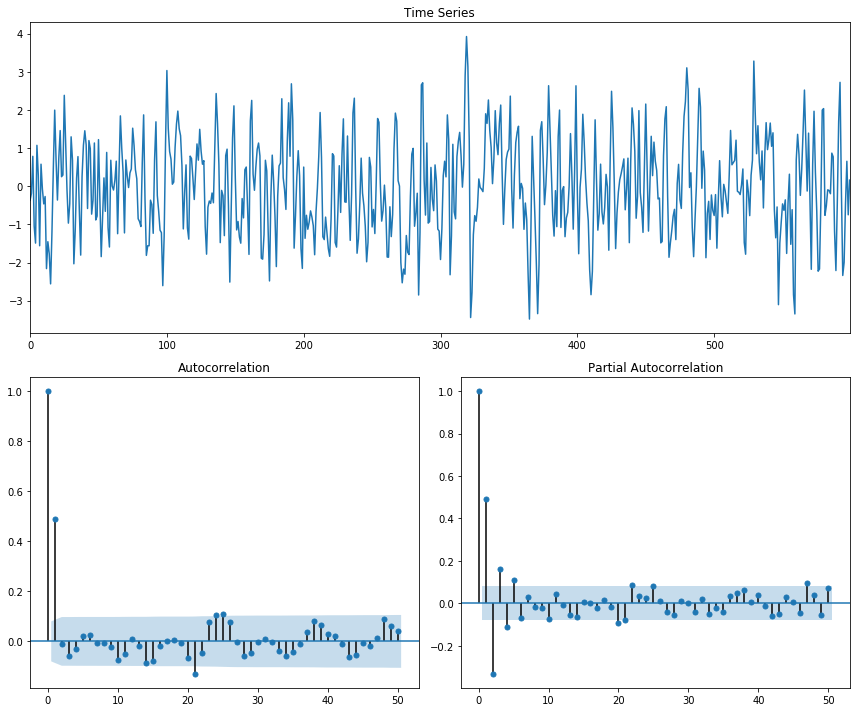

In [4]:
plotds(ma1_data)

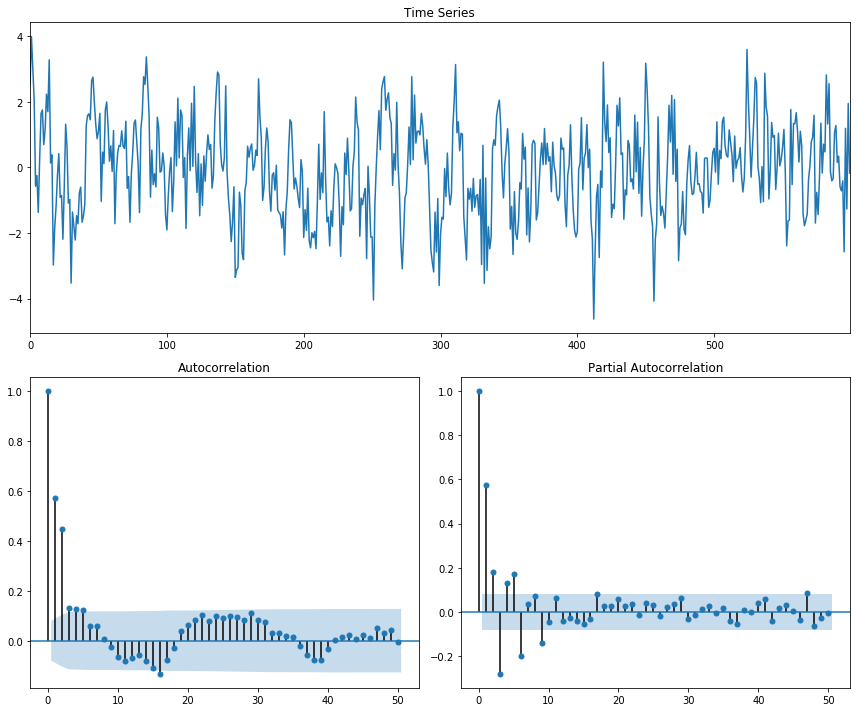

In [5]:
# MA(2)
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma2_data)

In [6]:
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1))\
           .fit(maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -857.652
Method:                           mle   S.D. of innovations              1.010
Date:                Tue, 21 Jan 2020   AIC                           1719.304
Time:                        07:36:52   BIC                           1728.097
Sample:                             0   HQIC                          1722.727
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.7212      0.027     26.267      0.000       0.667       0.775
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3866           +0.0000j            1.3866            0.5000
-----------------------------------------------------------------------------
"""

In [7]:
ma2 = smtsa.ARMA(ma2_data.tolist(), order=(0, 2))\
           .fit(maxlag=30, method='mle', trend='nc')
ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 2)   Log Likelihood                -882.271
Method:                           mle   S.D. of innovations              1.052
Date:                Tue, 21 Jan 2020   AIC                           1770.543
Time:                        07:36:52   BIC                           1783.733
Sample:                             0   HQIC                          1775.677
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.5975      0.031     19.032      0.000       0.536       0.659
ma.L2.y        0.6737      0.030     22.562      0.000       0.615       0.732
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.4435           -1.1348j            1.2184           -0.3093
MA.2           -0.4435           +1.1348j            1.2184            0.3093
-----------------------------------------------------------------------------
"""

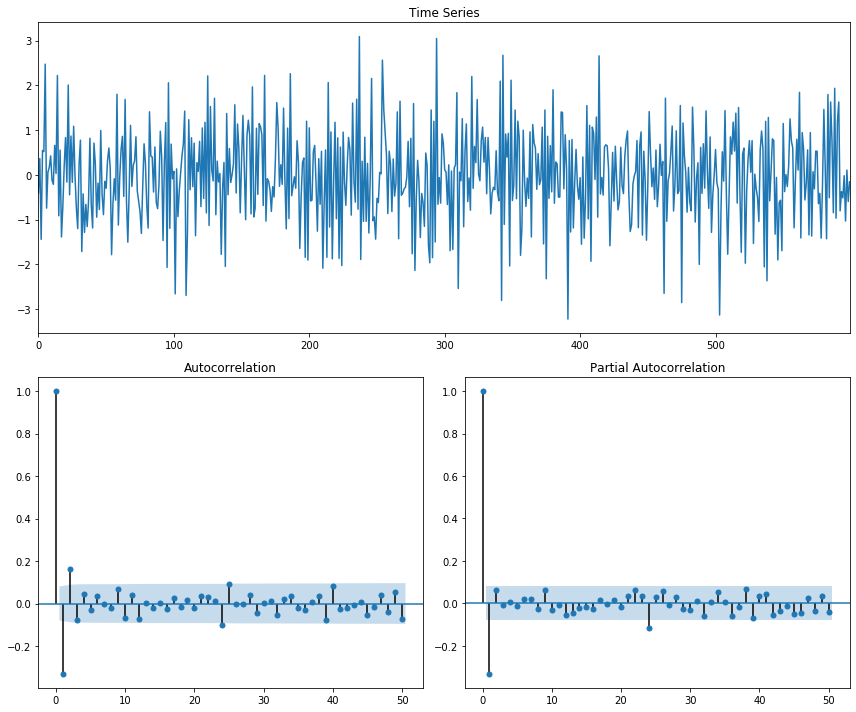

In [11]:
n = 600 
ar = np.r_[1, 0.6] 
ma = np.r_[1, 0.3] 
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)  
plotds(ar1ma1_data ) 

In [12]:
# ARMA(1, 1) mod
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1))\
    .fit(maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -836.847
Method:                           mle   S.D. of innovations              0.976
Date:                Tue, 21 Jan 2020   AIC                           1679.694
Time:                        07:40:43   BIC                           1692.885
Sample:                             0   HQIC                          1684.829
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.4947      0.105     -4.715      0.000      -0.700      -0.289
ma.L1.y        0.1861      0.119      1.567      0.118      -0.047       0.419
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0214           +0.0000j            2.0214            0.5000
MA.1           -5.3744           +0.0000j            5.3744            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
# optimize ARMA params
aic_val = []
for ar in range(1, 3):
    for ma in range(1, 3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ar, ma))\
            .fit(maxlag=30, method='mle', trend='nc')
        aic_val.append([ar, ma, arma_obj.aic])

In [15]:
pd.DataFrame(aic_val, columns=['AR', 'MA', 'AIC'])

,AR,MA,AIC
0,1,1,1679.694057
1,1,2,1681.694041
2,2,1,1681.694033
3,2,2,1683.664386


In [24]:
DATA = '../../../data'

ibm = pd.read_csv(f'{DATA}/IBM.csv')
ibm = ibm[['Date', 'Adj Close']]
ibm.rename(columns={'Adj Close': 'Close'}, inplace=True)
ibm.head()

,Date,Close
0,2001-01-02,56.790684
1,2001-01-03,63.361145
2,2001-01-04,62.398586
3,2001-01-05,62.942654
4,2001-01-08,62.649712


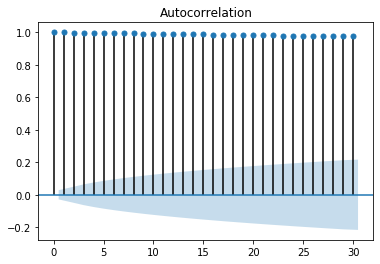

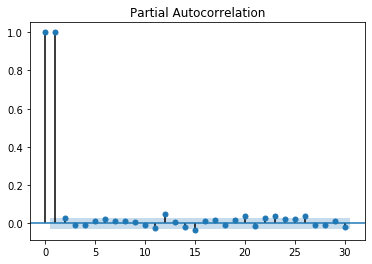

In [30]:
ibm['resid'] = ibm.Close - ibm.Close.mean()
ibm.dropna(inplace=True)

plot_acf(ibm.resid, lags=30);
plot_pacf(ibm.resid, lags=30);

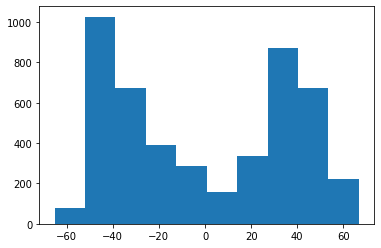

In [31]:
plt.hist(ibm.resid);